# Confounding Detection and Impact Measurement

## Overview



The dataset underpinning this analysis is drawn from the Behavioral Risk Factor Surveillance System (BRFSS) for the year 2015. This rich repository of health-related data, gleaned from telephone interviews, offers insights into the prevalence of heart disease across the United States. It captures a plethora of variables, including but not limited to high blood pressure, high cholesterol, smoking status, diabetes, and a range of demographic factors. With over 400,000 respondents, the BRFSS 2015 dataset serves as a robust foundation for examining the associations between lifestyle, health conditions, and heart disease on a scale that is both statistically significant and nationally representative.

In [1]:
# load essential libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# Load Dataset and Dataset Understanding

In [2]:
# load the dataset
data = pd.read_csv('data/heart_disease_health_indicators_BRFSS2015.csv')

# check the dimension of the dataset
num_records, num_columns = data.shape
print('The dataset contains {} of records and {} of columns.'.format(num_records, num_columns))

# check the attributes in the dataset
print('Attributes in the dataset: ', data.columns.values)

# view the first 5 rows of the dataset
pd.set_option('display.max_columns', 30)
data.head()

The dataset contains 253680 of records and 22 of columns.
Attributes in the dataset:  ['HeartDiseaseorAttack' 'HighBP' 'HighChol' 'CholCheck' 'BMI' 'Smoker'
 'Stroke' 'Diabetes' 'PhysActivity' 'Fruits' 'Veggies' 'HvyAlcoholConsump'
 'AnyHealthcare' 'NoDocbcCost' 'GenHlth' 'MentHlth' 'PhysHlth' 'DiffWalk'
 'Sex' 'Age' 'Education' 'Income']


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


#### Attributes Description:

1. HeartDiseaseorAttack - Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
2. HighBP - Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional
3. HighChol - Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high?
4. CholCheck - Cholesterol check within past five years
5. BMI - Body Mass Index (BMI)
6. Smoker - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
7. Stroke - (Ever told) you had a stroke.
8. Diabetes - (Ever told) you have diabetes 
9. PhysActivity - Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
10. Fruits - Consume Fruit 1 or more times per day 
11. Veggies - Consume Vegetables 1 or more times per day
12. HvyAlcoholConsump - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
13. AnyHealthcare - Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?
14. NoDocbcCost - Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?
15. GenHlth - Would you say that in general your health is?
16. MentHlth - Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?
17. PhysHlth - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?
18. DiffWalk - Do you have serious difficulty walking or climbing stairs? 
19. Sex - Indicate sex of respondent.
20. Age - Fourteen-level age category.
21. Education - What is the highest grade or year of school you completed?
22. Income - Is your annual household income from all sources.

In [3]:
# high level overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
# split the dataset into training and test set
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=122)

# check the dimension of the train and test datasets
print('Dimension of training dataset: ', train.shape)
print('Dimension of test dataset: ', test.shape)

Dimension of training dataset:  (202944, 22)
Dimension of test dataset:  (50736, 22)


# Exploratory Data Analysis (EDA)

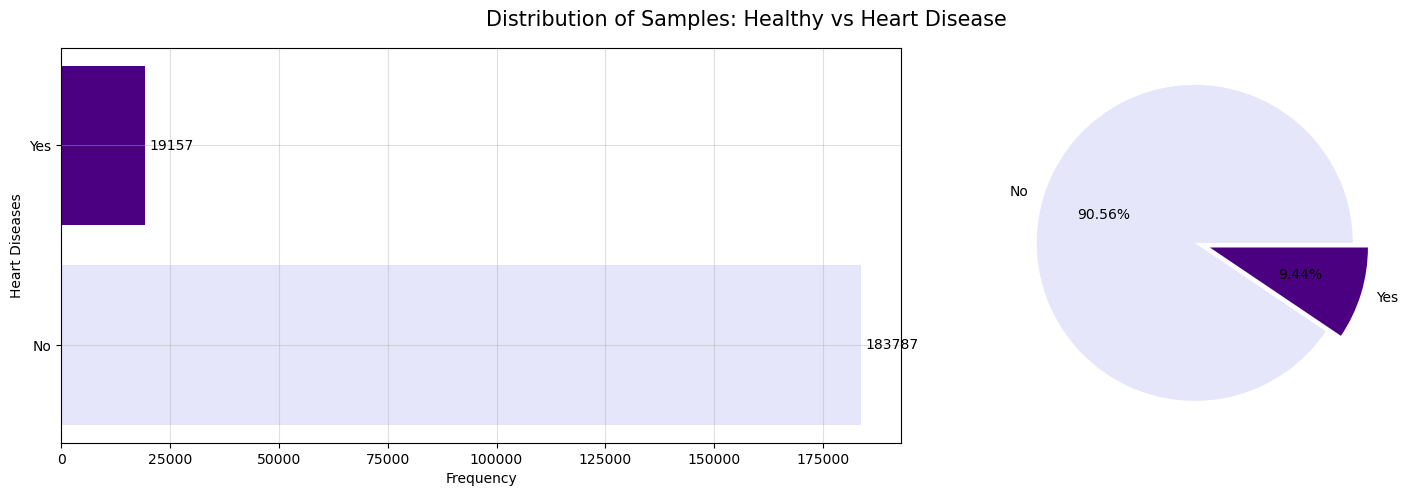

In [5]:
# distribution of the classes in training dataset
targets = train.HeartDiseaseorAttack.value_counts()
colors = ['lavender','indigo']

# visualization
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=targets.index, width=targets.values, color=colors)
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Heart Diseases')
axes[0].set_yticks([0,1], ['No','Yes'])
axes[0].grid(alpha=0.4)

for index, values in enumerate(targets):
    axes[0].text(values+1000, index, str(values), va='center')
    
axes[1].pie(targets.values, labels=['No','Yes'], autopct='%.2f%%', explode=([0.05]*len(targets.index)), colors=colors)

figure.suptitle('Distribution of Samples: Healthy vs Heart Disease', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

## Association & Confounding Detection

In [6]:
# helper function to perform Chi-square test
from scipy.stats.contingency import chi2_contingency, association

def chi2test_and_ratios(feature, outcome, featName, outcomeName, data):
    unique_values = np.sort(data[feature].unique())

    # Visualization
    plt.figure(figsize=(12, 5))
    ax = sns.countplot(data=data, x=feature, hue=outcome, order=unique_values, palette=['lavender', 'indigo'])
    plt.xlabel(featName)
    plt.ylabel('Frequency')
    plt.title(f'{featName} Distribution by {outcomeName} Status', fontsize=15)
    ax.legend(title=outcomeName, labels=['No', 'Yes'])
    plt.show()

    # Crosstab to calculate observed values for Chi-square test
    contingency_table = pd.crosstab(data[feature], data[outcome])
    lst = [f'{featName}={val}' for val in unique_values]
    contingency_table.index = lst
    contingency_table.columns = [f'{outcomeName} = No', f'{outcomeName} = Yes']
    print('Observed values:')
    display(contingency_table)

    # Perform chi-square test
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    # compute the effect size (Cramer's V)
    effect_size = round(association(contingency_table, method='cramer'), 4)

    # Calculate Prevalence Ratio
    p0 = contingency_table.iloc[0, 1] / contingency_table.iloc[0].sum()
    p1 = contingency_table.iloc[1, 1] / contingency_table.iloc[1].sum()
    prevalence_ratio = p1 / p0

    # Calculate Odds Ratio
    odds_ratio = (contingency_table.iloc[1, 1] * contingency_table.iloc[0, 0]) / (contingency_table.iloc[1, 0] * contingency_table.iloc[0, 1])

    # Print the test result
    print('Chi-square Test statistic:', round(chi2, 4))
    print('Chi-square Test p-value:', round(p_value, 4))
    print('Cramer V Effect size: ', effect_size)
    print('\n')
    print(f'Prevalence of {outcome} among {feature}==0: ', round(p0, 2))
    print(f'Prevalence of {outcome} among {feature}==1: ', round(p1, 2))
    print('Prevalence Ratio:', round(prevalence_ratio, 2))
    print('Odds Ratio:', round(odds_ratio, 2))


### Association between High Blood Pressure & Heart Diseases
#### Question | Is there a statistically significant association between high blood pressure and the likelihood of heart diseases? 

- Null Hypothesis (H0): There is no significant association between high blood pressure and the likelihood of heart diseases.
- Alternative Hypothesis (H1): There is a significant association between high blood pressure and the likelihood of heart diseases.

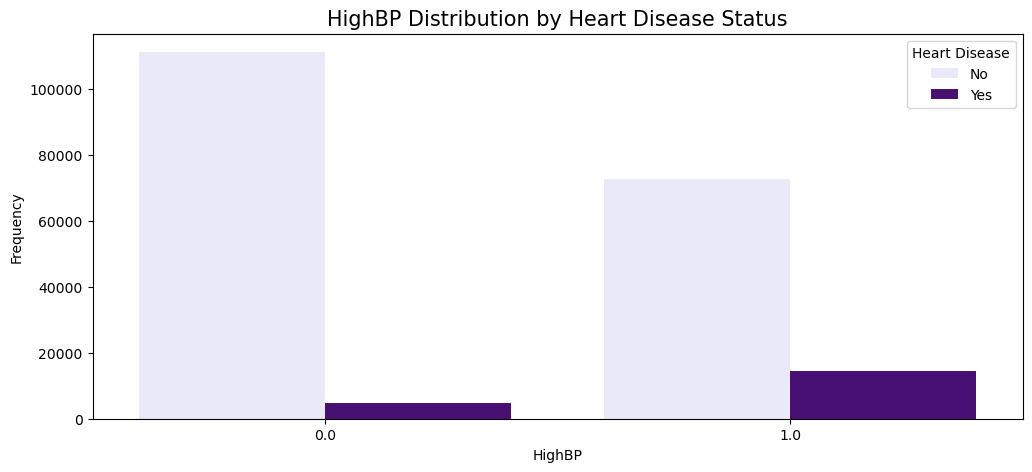

Observed values:


,Heart Disease = No,Heart Disease = Yes
HighBP=0.0,111108,4765
HighBP=1.0,72679,14392


Chi-square Test statistic: 8964.7304
Chi-square Test p-value: 0.0
Cramer V Effect size:  0.2102


Prevalence of HeartDiseaseorAttack among HighBP==0:  0.04
Prevalence of HeartDiseaseorAttack among HighBP==1:  0.17
Prevalence Ratio: 4.02
Odds Ratio: 4.62


In [7]:
chi2test_and_ratios('HighBP', 'HeartDiseaseorAttack', 'HighBP', 'Heart Disease', train)

##### Interpretation of statistical test result:

The chi-square test was employed to scrutinize the association between high blood pressure and the likelihood of heart diseases. The obtained p-value falls below the significance threshold (alpha=0.05), prompting the rejection of the null hypothesis. This implies a statistically significant association between high blood pressure and the likelihood of heart diseases in the analyzed dataset. The effect size, as gauged by Cramer's V, was computed to be 0.2102, indicating a moderate effect size. This suggests a noteworthy association between high blood pressure and heart diseases that cannot be overlooked. 

The prevalence of coronary heart disease among people without high blood pressure is 4765 divided by 111108, or 4% of all people with diabetes have coronary heart disease. Similarly the prevalence among those with high blood pressure is 17%. The prevalence ratio, considering whether high blood pressure is a risk factor for coronary heart disease is 17 / 4 = 4.02. The prevalence of coronary heart disease in people with high blood pressure is 4 times as great as it is in people without high blood pressure.

The odds of having high blood pressure among those with coronary heart disease is 4.62 times as high as the odds of having high blood pressure among those who do not have coronary heart disease.

In conclusion, the study reveals a substantial and meaningful relationship between the presence of high blood pressure and the occurrence of heart diseases in the studied population.

## Consider Smoking Habit as a Potential Confounder

### Question: "Is smoking habit  a risk factor for CHD (among people without high blood pressure)?"

First of all, prior knowledge tells us that smoking habit is related to many heart related diseases. Prior knowledge is an important first step but let's test this with data.

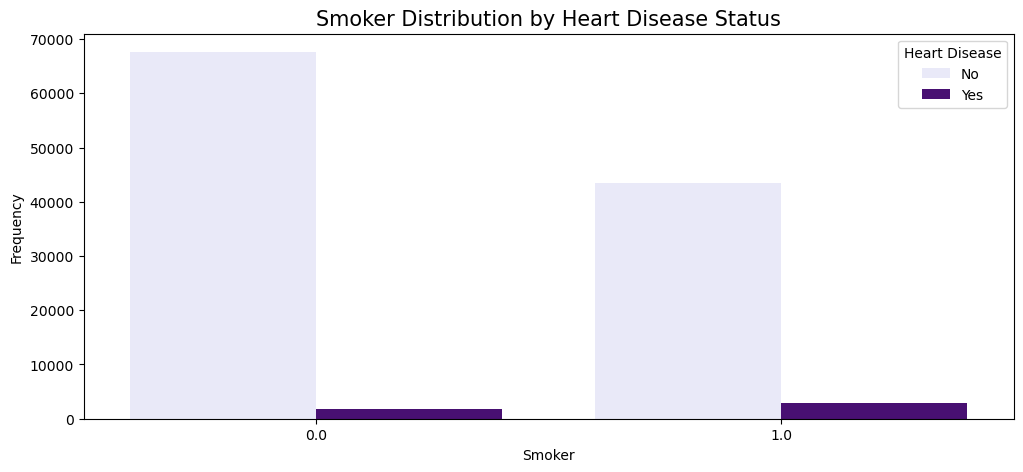

Observed values:


,Heart Disease = No,Heart Disease = Yes
Smoker=0.0,67603,1813
Smoker=1.0,43505,2952


Chi-square Test statistic: 987.6092
Chi-square Test p-value: 0.0
Cramer V Effect size:  0.0924


Prevalence of HeartDiseaseorAttack among Smoker==0:  0.03
Prevalence of HeartDiseaseorAttack among Smoker==1:  0.06
Prevalence Ratio: 2.43
Odds Ratio: 2.53


In [18]:
# among people without high blood pressure
# Filter the training data for HighBP == 0
train_no_highbp = train[train['HighBP'] == 0]

# Call the chi2test_and_ratios function for Smoker vs HeartDiseaseorAttack for the subset of data
chi2test_and_ratios('Smoker', 'HeartDiseaseorAttack', 'Smoker', 'Heart Disease', train_no_highbp)

**For people without high blood pressure**:

The chi-square analysis has revealed a compelling link between smoking status and heart disease incidence. The chi-square test statistic stands at a strikingly high value of 987.6092, coupled with a p-value of 0.0, which decisively indicates a statistically significant association; the null hypothesis of no association is firmly rejected. The Cramer's V value of 0.0924, while suggesting a relatively small effect size, still confirms that the relationship is statistically meaningful.

The observed prevalence of heart disease in non-smokers (Smoker=0.0) is approximately 3% (1813 out of 67603), while for smokers (Smoker=1.0) it doubles to roughly 6% (2952 out of 43505). The Prevalence Ratio of 2.43 indicates that the prevalence of heart disease in smokers is more than twice that of non-smokers. Similarly, the Odds Ratio of 2.53 suggests that the odds of having heart disease are more than two and a half times greater for smokers compared to non-smokers.

### This leads to the next question: "Is high blood pressure associated with smoking habit?"


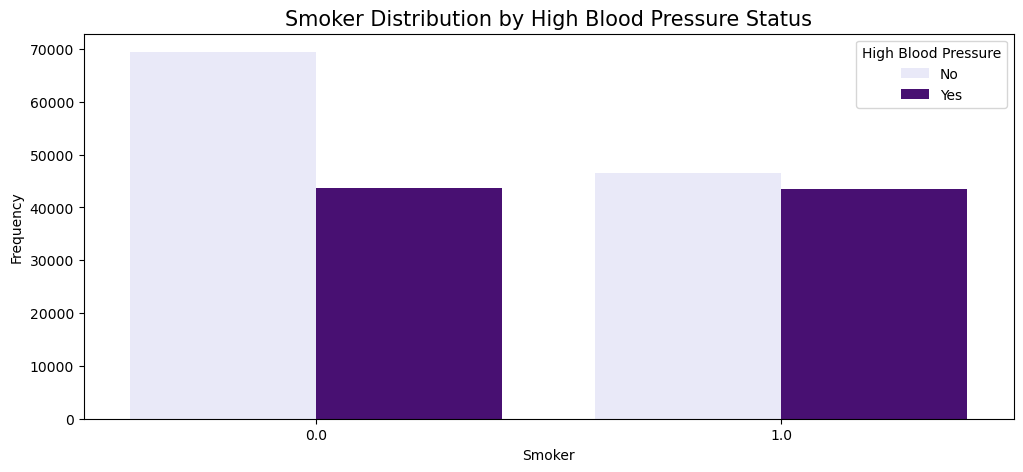

Observed values:


,High Blood Pressure = No,High Blood Pressure = Yes
Smoker=0.0,69416,43675
Smoker=1.0,46457,43396


Chi-square Test statistic: 1913.8225
Chi-square Test p-value: 0.0
Cramer V Effect size:  0.0971


Prevalence of HighBP among Smoker==0:  0.39
Prevalence of HighBP among Smoker==1:  0.48
Prevalence Ratio: 1.25
Odds Ratio: 1.48


In [19]:
chi2test_and_ratios('Smoker', 'HighBP', 'Smoker', 'High Blood Pressure', train)

The chi-square test was applied to evaluate the relationship between smoking status and the presence of high blood pressure. With a test statistic of 1913.8225 and a p-value of 0.0, the analysis indicates a statistically significant association; the null hypothesis that there is no association is soundly rejected. The Cramer's V value is 0.0971, suggesting a small yet non-negligible association between the variables.

Regarding prevalence, the data exhibits that 39% of non-smokers (Smoker=0.0) have high blood pressure, in contrast to 48% of smokers (Smoker=1.0). This difference is reflected in the Prevalence Ratio of 1.25, implying that the prevalence of high blood pressure is 25% higher in smokers compared to non-smokers. The Odds Ratio of 1.48 strengthens this finding, indicating that smokers are 48% more likely to have high blood pressure compared to non-smokers.

Although the Cramer's V suggests only a small effect size, the elevated prevalence and odds ratios emphasize the public health significance of smoking as a risk factor for high blood pressure. This affirms the importance of smoking prevention and cessation efforts in mitigating the risk of high blood pressure and related health complications.

### A final question, "Is smooking habit an intermediate pathway between high blood pressure and development of CHD?" 

Does smoking habit cause high blood pressure which then causes coronary heart disease? Based on biology, that is not the case. High blood pressure in and of itself can cause coronary heart disease. Using the data and prior knowledge, it is obvious to conclude that smoking is a major confounder in the high blood pressure - CHD relationship.

A pertinent inquiry in the realm of cardiovascular health is whether smoking serves as an intermediary between high blood pressure and the onset of coronary heart disease (CHD). Does smoking precipitate high blood pressure, which in turn leads to CHD? Biological evidence suggests that high blood pressure is a direct risk factor for CHD and can contribute to its development independently of smoking. However, smoking is widely recognized as a significant confounder in the relationship between high blood pressure and CHD. This is because smoking itself is a risk factor for both high blood pressure and CHD. Data analysis, informed by existing medical knowledge, reinforces the interpretation that smoking complicates the association between high blood pressure and CHD, but it is not necessarily a sequential mediator in the causal pathway.

## Measure the Impact of Confounding

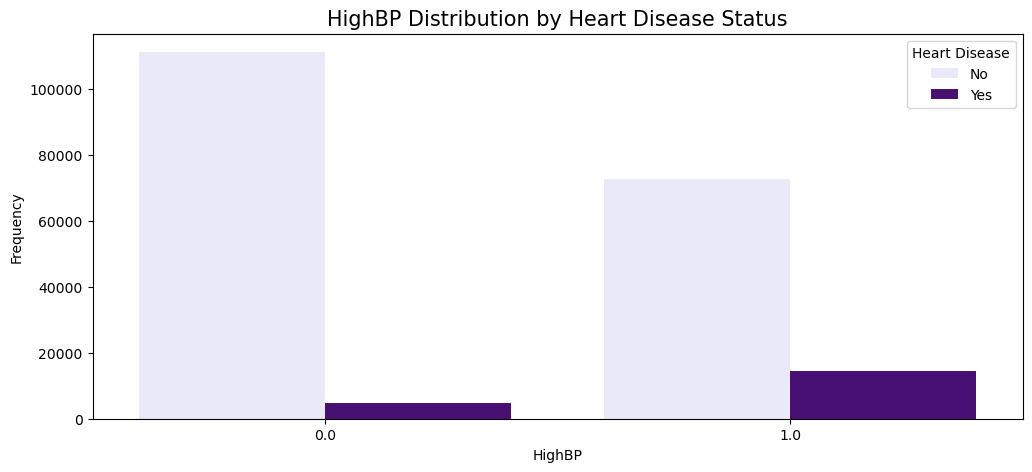

Observed values:


,Heart Disease = No,Heart Disease = Yes
HighBP=0.0,111108,4765
HighBP=1.0,72679,14392


Chi-square Test statistic: 8964.7304
Chi-square Test p-value: 0.0
Cramer V Effect size:  0.2102


Prevalence of HeartDiseaseorAttack among HighBP==0:  0.04
Prevalence of HeartDiseaseorAttack among HighBP==1:  0.17
Prevalence Ratio: 4.02
Odds Ratio: 4.62


In [9]:
# crude high BP - CHD association
chi2test_and_ratios('HighBP', 'HeartDiseaseorAttack', 'HighBP', 'Heart Disease', train)

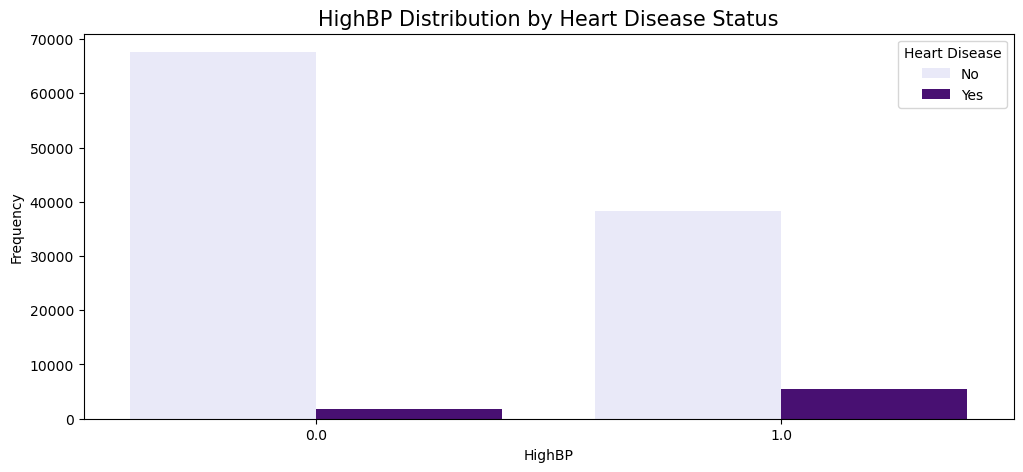

Observed values:


,Heart Disease = No,Heart Disease = Yes
HighBP=0.0,67603,1813
HighBP=1.0,38242,5433


Chi-square Test statistic: 4316.1992
Chi-square Test p-value: 0.0
Cramer V Effect size:  0.1954


Prevalence of HeartDiseaseorAttack among HighBP==0:  0.03
Prevalence of HeartDiseaseorAttack among HighBP==1:  0.12
Prevalence Ratio: 4.76
Odds Ratio: 5.3


In [17]:
# among non-smokers
train_non_smoker = train[train['Smoker'] == 0]

chi2test_and_ratios('HighBP', 'HeartDiseaseorAttack', 'HighBP', 'Heart Disease', train_non_smoker)

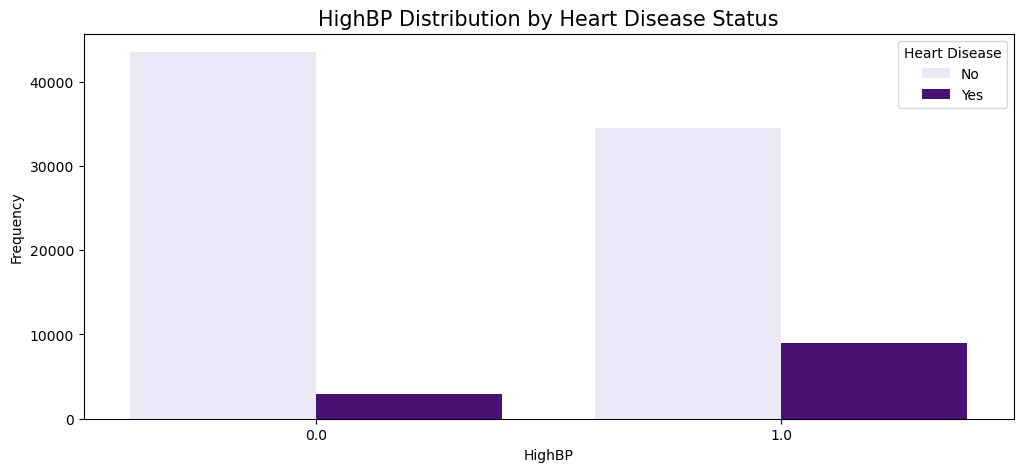

Observed values:


,Heart Disease = No,Heart Disease = Yes
HighBP=0.0,43505,2952
HighBP=1.0,34437,8959


Chi-square Test statistic: 3983.5738
Chi-square Test p-value: 0.0
Cramer V Effect size:  0.2106


Prevalence of HeartDiseaseorAttack among HighBP==0:  0.06
Prevalence of HeartDiseaseorAttack among HighBP==1:  0.21
Prevalence Ratio: 3.25
Odds Ratio: 3.83


In [11]:
# among smokers
train_smoker = train[train['Smoker'] == 1]

chi2test_and_ratios('HighBP', 'HeartDiseaseorAttack', 'HighBP', 'Heart Disease', train_smoker)

In [18]:
5433 + 38242 + 1813 + 67603

113091

In [19]:
8959 + 34437 + 2952 + 43505

89853

In [21]:
# Manual calculation for the Mantel-Haenszel numerator and denominator and then computing the ratio.
numerator = (67603 * 5433) / 113091 + (43505 * 8959) / 89853
denominator = (38242 * 1813) / 113091 + (34437 * 2952) / 89853

# Computing the ratio
mh_ratio = numerator / denominator
mh_ratio


4.348345067085728